In [1]:
#@title Set up Directory { run: "auto"}
import os
from IPython.display import clear_output
from google.colab import drive 
from IPython.display import clear_output
drive.mount('/content/gdrive')
working_directory = 'My Drive/Khairiyah_Bte_Mohamed_Ridhwan' #@param {type:"string"}
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/Khairiyah_Bte_Mohamed_Ridhwan


In [2]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 7.4MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
import os
import math
from datetime import datetime

import plotly.express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.style as style
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Text Preprocessing

def remove_urls(s):
    # re.sub(pattern,repl,string) is used to replace substrings. Will replace the matches in string with repl
    return re.sub(r'https?://\S+', "", s)

def remove_usernames(s):
    return re.sub(r'@\S+', "", s)

def remove_specialchar(text, remove_digits=False):    
    if not remove_digits:
        pattern = r'[^a-zA-z0-9\s]'
    else:
        pattern = r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [5]:
tweets = pd.read_csv('data/tweets_final.csv', index_col=0)

tweets.columns
tweets.shape
tweets.head()

,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text
1,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Canada Buying Doses of Covid-19 Vaccine From N...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,canada buying doses covid vaccine novavax j amp j
2,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Heat Waves Hurting Cities Most Vulnerable to C...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,heat waves hurting cities vulnerable covid
3,2020-08-31 16:07:16+00:00,https://twitter.com/onefern/status/13004651859...,1.300465e+18,5.447890e+08,One of my fave after dinner snacks nowadays if...,onefern,Singapore,0,0,0,0,en,NaN,NaN,NaN,one fave dinner snacks nowadays m still peckis...
4,2020-08-31 14:25:48+00:00,https://twitter.com/sinsica/status/13004396509...,1.300440e+18,2.384276e+08,Please be safe guys .. take all precautions an...,sinsica,Singapore,0,0,1,0,en,NaN,NaN,NaN,please safe guys take precautions safety measu...
5,2020-08-31 11:49:25+00:00,https://twitter.com/heroroxas/status/130040029...,1.300400e+18,1.964754e+09,Where i'd rather be kasi it's covid-free #tb @...,heroroxas,NaN,0,0,0,0,en,NaN,NaN,NaN,d rather kasi s covid free batanes philippines


In [6]:
tweets.shape

(5267, 16)

In [7]:
#Add date and month column
date = pd.to_datetime(tweets['Datetime'], format='%Y-%m-%d')
tweets['date'] = date.dt.date

# Convert date to datetime
tweets['date'] = pd.to_datetime(tweets['date'], errors='coerce')

# Add column for month
tweets['month'] = tweets['date'].dt.month

# Add column for week number
tweets['week'] = tweets['date'].apply(lambda x: x.isocalendar()[1])

tweets.head()

,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week
1,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Canada Buying Doses of Covid-19 Vaccine From N...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,canada buying doses covid vaccine novavax j amp j,2020-08-31,8,36
2,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Heat Waves Hurting Cities Most Vulnerable to C...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,heat waves hurting cities vulnerable covid,2020-08-31,8,36
3,2020-08-31 16:07:16+00:00,https://twitter.com/onefern/status/13004651859...,1.300465e+18,5.447890e+08,One of my fave after dinner snacks nowadays if...,onefern,Singapore,0,0,0,0,en,NaN,NaN,NaN,one fave dinner snacks nowadays m still peckis...,2020-08-31,8,36
4,2020-08-31 14:25:48+00:00,https://twitter.com/sinsica/status/13004396509...,1.300440e+18,2.384276e+08,Please be safe guys .. take all precautions an...,sinsica,Singapore,0,0,1,0,en,NaN,NaN,NaN,please safe guys take precautions safety measu...,2020-08-31,8,36
5,2020-08-31 11:49:25+00:00,https://twitter.com/heroroxas/status/130040029...,1.300400e+18,1.964754e+09,Where i'd rather be kasi it's covid-free #tb @...,heroroxas,NaN,0,0,0,0,en,NaN,NaN,NaN,d rather kasi s covid free batanes philippines,2020-08-31,8,36


## Text preprocessing


In [8]:
# Get list of tweets
tweets_list = tweets['Text'].tolist()
tweets_list[:10]

['Canada Buying Doses of Covid-19 Vaccine From Novavax, J&amp;J https://t.co/pUyCwpggX1',
 'Heat Waves Hurting Cities Most Vulnerable to Covid-19 https://t.co/cebvNELdJ6',
 "One of my fave after dinner snacks nowadays if I'm still peckish during #wfh period\r\n#chickenwings #chickenwing #wings #chicken #snacks #fingerfood #barbites #buffalowings\r\n#wfh #covid19 #coronavirus #workfromhome @… https://t.co/Z5UFoi0ejf",
 'Please be safe guys .. take all precautions and safety measures. \r\n\r\nTry to avoid crowded places and maintain social distancing.  #Coronavirus #SafetyFirst #COVID19 https://t.co/gt7Evgcjqd',
 "Where i'd rather be kasi it's covid-free #tb @ Batanes, Philippines https://t.co/NSiudl2xBu",
 '@Infosys_GSTN Hello Team, Any update on the eInvoicing deadline extension from 1–Oct-2020? Due to covid situation companies with more than 500 crore revenue aren’t ready with implementation.',
 "@LukeGromen @profplum99 @GreekFire23 @hendry_hugh @scientificecon Covid helps to plug the

In [9]:
# Text Preprocessing

tweets_list_processed = []
for tweet in tweets_list:
    tweet = remove_urls(tweet)
    tweet = remove_usernames(tweet)
    tweets_list_processed.append(tweet)

tweets_list_processed

['Canada Buying Doses of Covid-19 Vaccine From Novavax, J&amp;J ',
 'Heat Waves Hurting Cities Most Vulnerable to Covid-19 ',
 "One of my fave after dinner snacks nowadays if I'm still peckish during #wfh period\r\n#chickenwings #chickenwing #wings #chicken #snacks #fingerfood #barbites #buffalowings\r\n#wfh #covid19 #coronavirus #workfromhome  ",
 'Please be safe guys .. take all precautions and safety measures. \r\n\r\nTry to avoid crowded places and maintain social distancing.  #Coronavirus #SafetyFirst #COVID19 ',
 "Where i'd rather be kasi it's covid-free #tb @ Batanes, Philippines ",
 ' Hello Team, Any update on the eInvoicing deadline extension from 1–Oct-2020? Due to covid situation companies with more than 500 crore revenue aren’t ready with implementation.',
 "     Covid helps to plug the leak via point 1 very effectively.  Don't expect the return of the chinese tourist anytime soon. ",
 '  States can not immunity from shortfall in revenue from Covid caused lockdown',
 ' Ehh,

Apply VADER sentiment analysis(positive, negative, neutral)

In [10]:
analyser = SentimentIntensityAnalyzer()

In [11]:
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [12]:
# Get a list of sentiment scores for tweets

sentiment_score_list = []
for sentence in tweets_list_processed:
    sentiment_score = sentiment_analyzer_score(str(sentence))
    sentiment_score_list.append(sentiment_score)

sentiment_score_list[:10]

[0.0, -0.5984, 0.4404, 0.7003, 0.0, 0.3612, 0.5256, 0.0, -0.0516, 0.1027]

In [13]:
# Add 'sentiment_score' column

tweets['sentiment_score'] = sentiment_score_list
tweets.head()

,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,sentiment_score
1,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Canada Buying Doses of Covid-19 Vaccine From N...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,canada buying doses covid vaccine novavax j amp j,2020-08-31,8,36,0.0000
2,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Heat Waves Hurting Cities Most Vulnerable to C...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,heat waves hurting cities vulnerable covid,2020-08-31,8,36,-0.5984
3,2020-08-31 16:07:16+00:00,https://twitter.com/onefern/status/13004651859...,1.300465e+18,5.447890e+08,One of my fave after dinner snacks nowadays if...,onefern,Singapore,0,0,0,0,en,NaN,NaN,NaN,one fave dinner snacks nowadays m still peckis...,2020-08-31,8,36,0.4404
4,2020-08-31 14:25:48+00:00,https://twitter.com/sinsica/status/13004396509...,1.300440e+18,2.384276e+08,Please be safe guys .. take all precautions an...,sinsica,Singapore,0,0,1,0,en,NaN,NaN,NaN,please safe guys take precautions safety measu...,2020-08-31,8,36,0.7003
5,2020-08-31 11:49:25+00:00,https://twitter.com/heroroxas/status/130040029...,1.300400e+18,1.964754e+09,Where i'd rather be kasi it's covid-free #tb @...,heroroxas,NaN,0,0,0,0,en,NaN,NaN,NaN,d rather kasi s covid free batanes philippines,2020-08-31,8,36,0.0000


In [14]:
# Label sentiments (positive, negative, neutral) based on sentiment_score for each tweet

tweets['sentiment_score'].apply(lambda x: float(x))
tweets['sentiment_label'] = 'NA'
tweets.loc[(-0.05 < tweets.sentiment_score) &  (tweets.sentiment_score < 0.05) , 'sentiment_label'] = 'neutral'
tweets.loc[tweets.sentiment_score <= -0.05, 'sentiment_label'] = 'negative'
tweets.loc[tweets.sentiment_score >= 0.05, 'sentiment_label'] = 'positive'

tweets.head()

,Datetime,Tweet.URL,Tweet.Id,Tweet.User.Id,Text,Username,User.Location,replyCount,retweetCount,likeCount,quoteCount,language,retweetedTweet,quotedTweet,mentionedUsers,clean_text,date,month,week,sentiment_score,sentiment_label
1,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Canada Buying Doses of Covid-19 Vaccine From N...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,canada buying doses covid vaccine novavax j amp j,2020-08-31,8,36,0.0000,neutral
2,2020-08-31 22:27:32+00:00,https://twitter.com/VishnoiSays/status/1300560...,1.300561e+18,8.134247e+07,Heat Waves Hurting Cities Most Vulnerable to C...,VishnoiSays,Singapore,0,0,0,0,en,NaN,NaN,NaN,heat waves hurting cities vulnerable covid,2020-08-31,8,36,-0.5984,negative
3,2020-08-31 16:07:16+00:00,https://twitter.com/onefern/status/13004651859...,1.300465e+18,5.447890e+08,One of my fave after dinner snacks nowadays if...,onefern,Singapore,0,0,0,0,en,NaN,NaN,NaN,one fave dinner snacks nowadays m still peckis...,2020-08-31,8,36,0.4404,positive
4,2020-08-31 14:25:48+00:00,https://twitter.com/sinsica/status/13004396509...,1.300440e+18,2.384276e+08,Please be safe guys .. take all precautions an...,sinsica,Singapore,0,0,1,0,en,NaN,NaN,NaN,please safe guys take precautions safety measu...,2020-08-31,8,36,0.7003,positive
5,2020-08-31 11:49:25+00:00,https://twitter.com/heroroxas/status/130040029...,1.300400e+18,1.964754e+09,Where i'd rather be kasi it's covid-free #tb @...,heroroxas,NaN,0,0,0,0,en,NaN,NaN,NaN,d rather kasi s covid free batanes philippines,2020-08-31,8,36,0.0000,neutral


In [15]:
# Run only if you want to save the results
# tweets.to_csv('data/tweets_final_vader.csv', sep=',', index = False)

## Plots for VADER results

In [16]:
tweets_df = tweets[['Text', 'sentiment_score', 'sentiment_label']]
tweets_df.head()

,Text,sentiment_score,sentiment_label
1,Canada Buying Doses of Covid-19 Vaccine From N...,0.0000,neutral
2,Heat Waves Hurting Cities Most Vulnerable to C...,-0.5984,negative
3,One of my fave after dinner snacks nowadays if...,0.4404,positive
4,Please be safe guys .. take all precautions an...,0.7003,positive
5,Where i'd rather be kasi it's covid-free #tb @...,0.0000,neutral


In [17]:
# Get the frequency of tweet with each emotions by month

import plotly.express as px

no_of_tweets_permonth = tweets.groupby(['sentiment_label','week']).size().reset_index(name='counts')
no_of_tweets_permonth

fig = px.line(no_of_tweets_permonth, x="week", y="counts", color='sentiment_label', title="Frequency of tweet with each VADER sentiment per week")
fig.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.update_layout(
    xaxis_title="Week",
    yaxis_title="Tweet counts",
    font=dict(size=14
    )
)

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 6, x1= 6,line=dict(
        color="Black",
        width=1.2,
        dash="dot",
    )
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 12, x1= 12,line=dict(
        color="Black",
        width=1.2,
        dash="dot",
    )
    ),
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 15, x1= 15,line=dict(
        color="Black",
        width=1.2,
        dash="dot",
    )
    )])


fig.add_annotation(
     x=6,
        y=0.98,
        xref="x",
        yref="paper",
        text="[A]"
        )

fig.add_annotation(
     x=12,
        y=0.98,
        xref="x",
        yref="paper",
        text="[B]"
        )

fig.add_annotation(
     x=15,
        y=0.98,
        xref="x",
        yref="paper",
        text="[C]"
        )

fig.show()

# !pip install plotly>=4.0.0
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4
# fig.write_image("plot_outputs/vader_weekly.png")

In [18]:
# Get number of tweets for each sentiment

tweets_persentiment = tweets.groupby(['sentiment_label']).size().reset_index(name='num_posts')
tweets_persentiment

,sentiment_label,num_posts
0,negative,1362
1,neutral,1260
2,positive,2645


In [19]:
tweets_persentiment['percentage_of_total'] = tweets_persentiment['num_posts'].apply(lambda x: round(x / tweets.shape[0],2) * 100)
tweets_persentiment = tweets_persentiment.sort_values(by=['percentage_of_total'], ascending=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


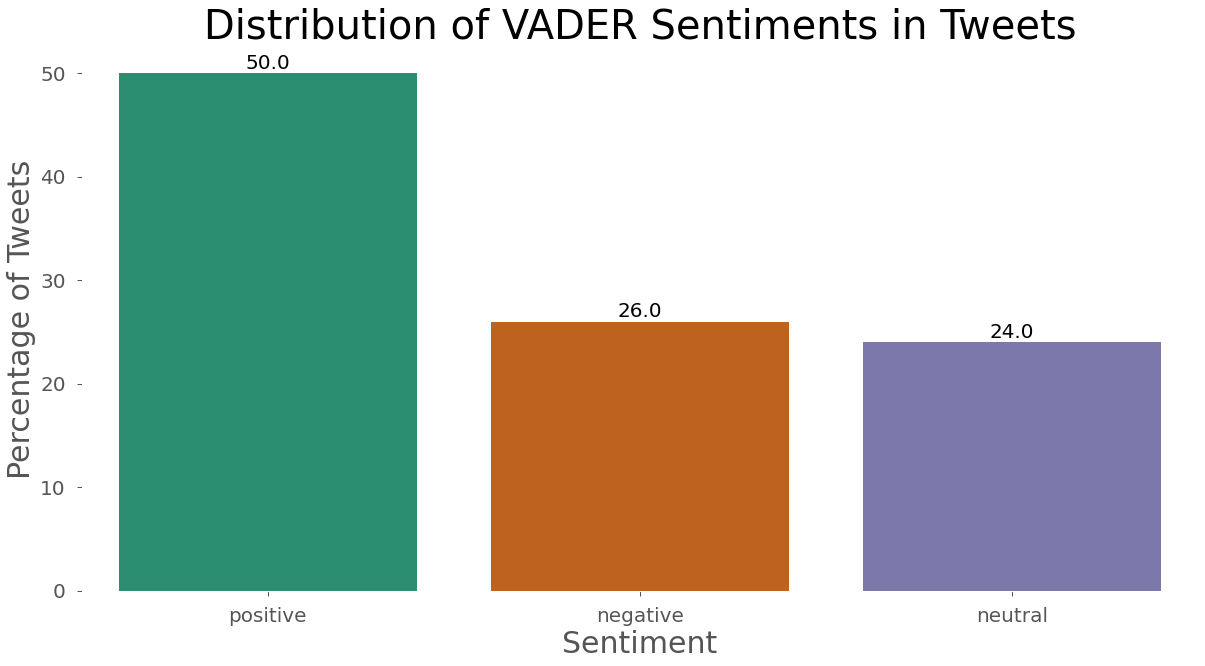

In [20]:
# Visualise percentage of posts with each sentiment

#### Plot settings ####
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
matplotlib.rcParams['font.family'] = "Arial"
matplotlib.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [20, 10]
#plt.rcParams['axes.facecolor'] = 'white'

sns.set_context('paper')
####

ax = sns.barplot(x="sentiment_label",
                 y="percentage_of_total",
                 data=tweets_persentiment,
                 palette=("Dark2")
        
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', size=20 )


#ax.set(xlabel='Sentiment', ylabel='Percentage of Singapore Tweets')
ax.axes.set_title("Distribution of VADER Sentiments in Tweets",fontsize=40)
ax.set_xlabel("Sentiment",fontsize=30)
ax.set_ylabel('Percentage of Tweets',fontsize=30)
ax.tick_params(labelsize=20)
ax.set_facecolor('w')